In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_156792\4125492929.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


### Reference

- https://www.kaggle.com/code/kanncaa1/dataiteam-titanic-eda/notebook

- WEIGHT OF EVIDENCE (WOE) AND INFORMATION VALUE (IV) EXPLAINED : https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html

## some of the libraries that help with basic level of investigation with the data is 
1. DTale 
2. Pandas-profiling 
3. sweetviz 
4. autoviz 
5. dataprep 
6. KLib 
7. dabl 
8. speedML 
9. edaviz 
10. datatile

In [4]:
## pd.read_csv(r"C:\Users\LENOVO\UpGradCourse\MAIN_COURSE\LIVE_SESSIONS\PI\train.csv")
train_df = pd.read_csv('train.csv')
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.shape

(891, 12)

In [7]:
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [8]:
train_df.dropna(how="all", axis=0)

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

# Univariate Analysis

## 1. Categorical variables

In [9]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = train_df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

In [10]:
## TO BE IGNORED

# Exract the categorical column
cat_df = train_df.select_dtypes(exclude='number')
print(cat_df.columns)

# category1 = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]

## This code shall plot all the numerical values in a bar plot : if a column has large number of unique value
## it will create not a effective graph

# for c in cat_df.columns:
#     bar_plot(c)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


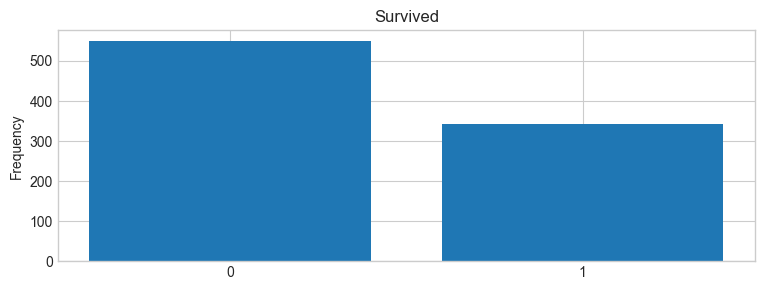

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


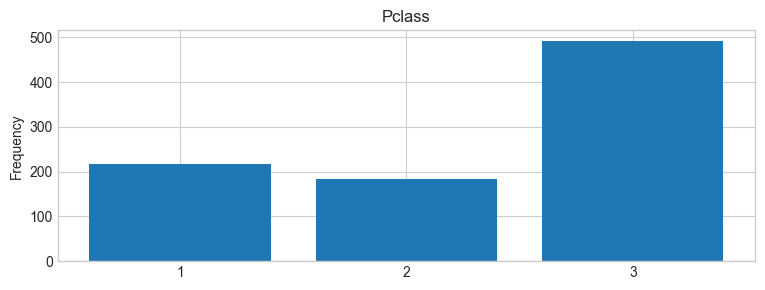

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


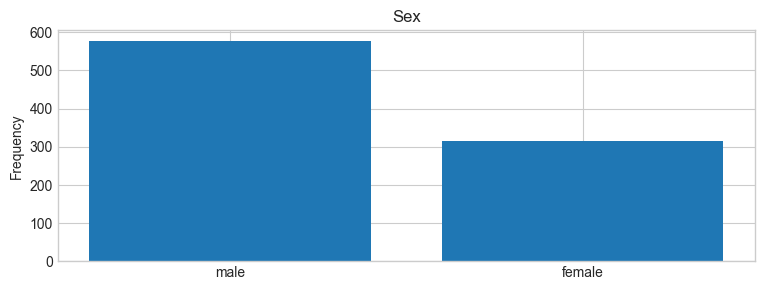

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


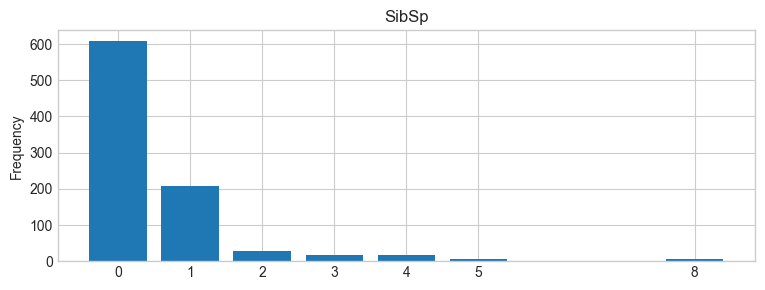

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


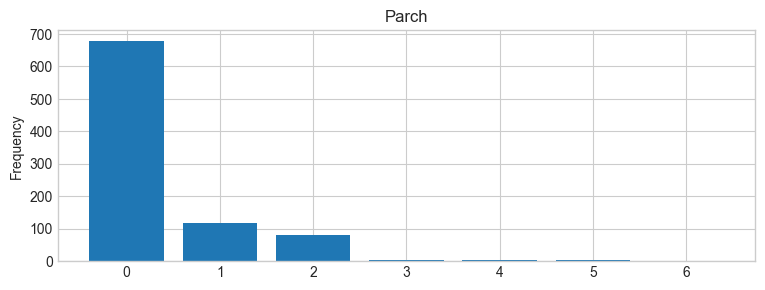

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


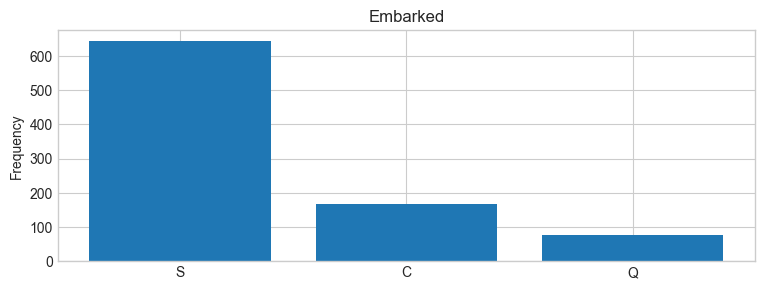

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [11]:
## To solve this - write a code to check the unique values in a particular field
## for the unique values is <= 10 , plot that field

for col in train_df.columns:
    num_unique_value = train_df[col].nunique()
    if num_unique_value <= 10:
        bar_plot(col)

## 2. NUMERICAL VARIABLES

In [12]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

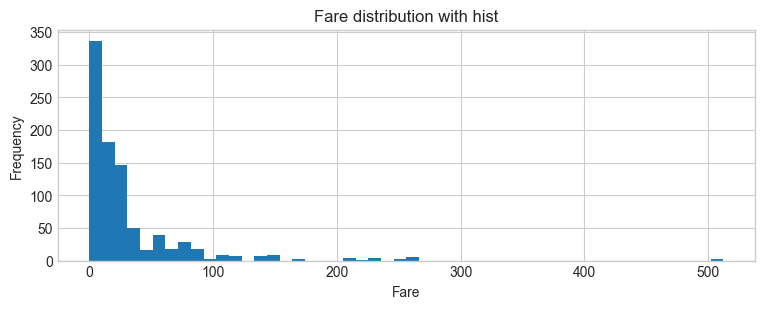

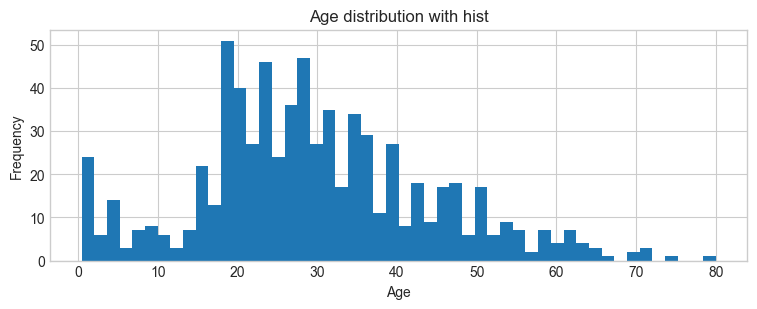

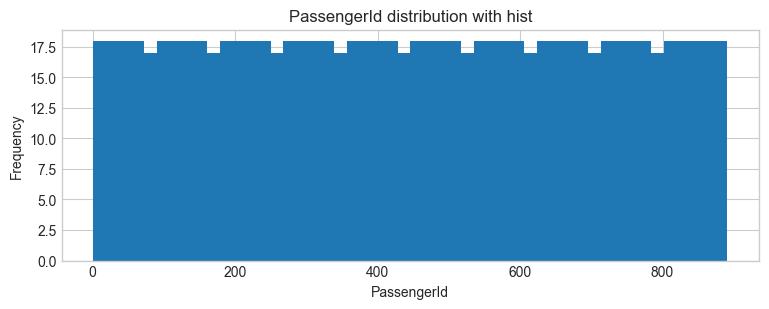

In [13]:
## TO BE IGNORED

## The varaible are hard-coded
numericVar = ["Fare", "Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

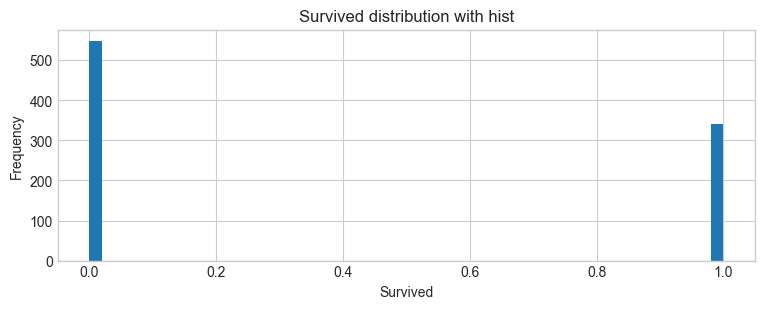

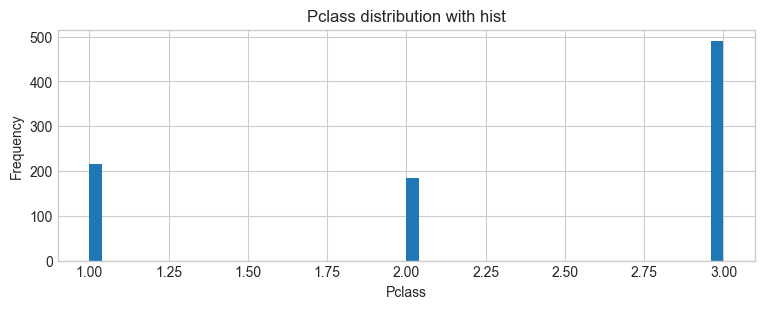

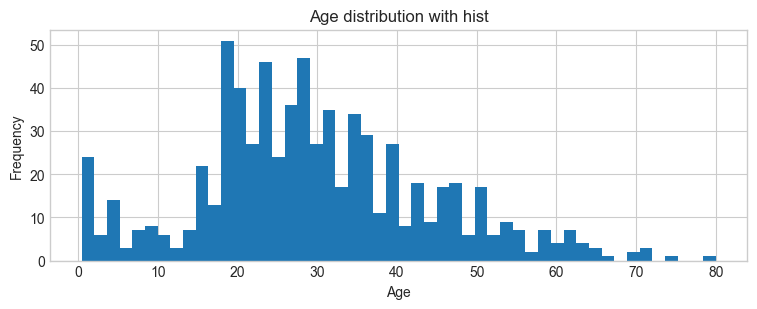

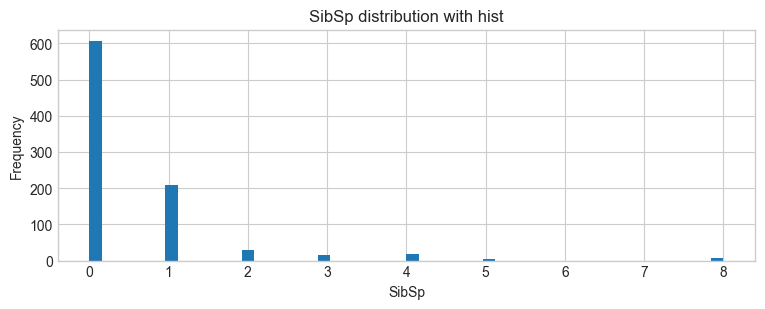

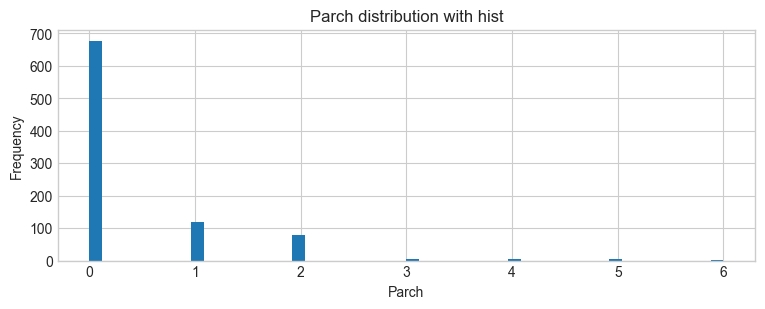

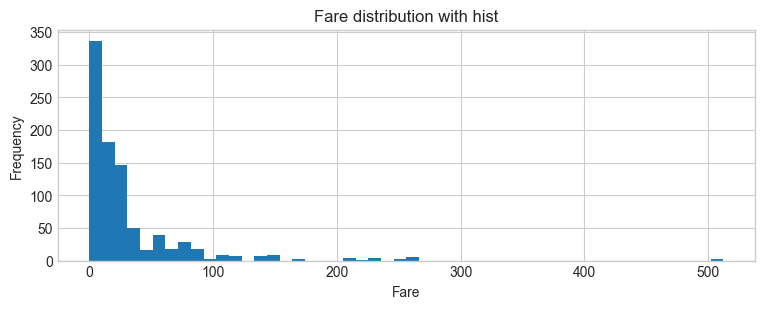

In [14]:
## GENERIC CODE

num_df_columns = train_df.select_dtypes(include='number')
for col in num_df_columns:
    num_unique_value = train_df[col].nunique()
    if num_unique_value != num_df_columns.shape[0]:
        plot_hist(col)

# Information Value & woe
- https://docs.google.com/document/d/14R2TcbA4Xw2dT9-XAb1uWOiea2wdbDDzIjbC-dn8vrw/edit
- https://github.com/Sundar0989/WOE-and-IV/blob/master/WOE_IV.ipynb

In [19]:
def calculate_woe_iv(dataset, feature_b, target, targetcat):
    
    dataset[feature_b].replace([np.inf, -np.inf], np.nan, inplace = True)
     
    
    
    if dataset[feature_b].dtype in ['float64', 'int64']:
        #dataset[dataset[feature_b]< 0][feature_b] = 0
        dataset['feature'] = pd.qcut(dataset[feature_b], q = [0, .05, .1, .2,.4, .6, .8,0.9,0.95, 1],
                                     duplicates = 'drop', precision = 0).values.add_categories(['Missing', 'Others'])
    else:
        dataset['feature'] = dataset[feature_b]

    dataset['feature'].fillna('Missing', inplace = True)

    lst = []
    num_rows = dataset.shape[0]

    val_list = dataset['feature'].unique()
    for val in val_list:
        occ_val = dataset[dataset['feature'] == val].count()['feature']
        if occ_val < 0.005 * num_rows :
            dataset['feature'] = np.where(dataset['feature'] == val, 'Others', dataset['feature'])

    val_list = dataset['feature'].unique()
    for val in val_list:
        lst.append({
        'Feature': feature_b,
        'Value': val,
        'Min_val': dataset[dataset['feature'] == val].min()[feature_b],
        'All': dataset[dataset['feature'] == val].count()['feature'],
        'Good': dataset[(dataset['feature'] == val) & (dataset[target] != targetcat)].count()['feature'],
        'Bad': dataset[(dataset['feature'] == val) & (dataset[target] == targetcat)].count()['feature']
        })

    dset = pd.DataFrame(lst)
    dset['Event_Rate'] = dset['Bad'] / dset['All']
    dset['Prop'] = dset['All'] / dset['All'].sum()
    dset['Prop_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Prop_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Prop_Good'] / dset['Prop_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Prop_Good'] - dset['Prop_Bad']) * dset['WoE']

    iv = dset['IV'].sum()

    dset = dset.sort_values(by = 'Min_val')

    return dset, iv


Information Value :  PassengerId  -  0.07617435145035947
Information Value :  Survived  -  0.0
Information Value :  Pclass  -  0.4518713131593065
Information Value :  Name  -  0.0
Information Value :  Sex  -  1.3416814135556492
Information Value :  Age  -  0.12984926632411978
Information Value :  SibSp  -  0.07139326466248687
Information Value :  Parch  -  0.026799658477586738
Information Value :  Ticket  -  0.019762235014319646
Information Value :  Fare  -  0.6128177460802051
Information Value :  Cabin  -  0.42196250915906564
Information Value :  Embarked  -  0.12237459212165319
Information Value :  feature  -  0.12237459212165319


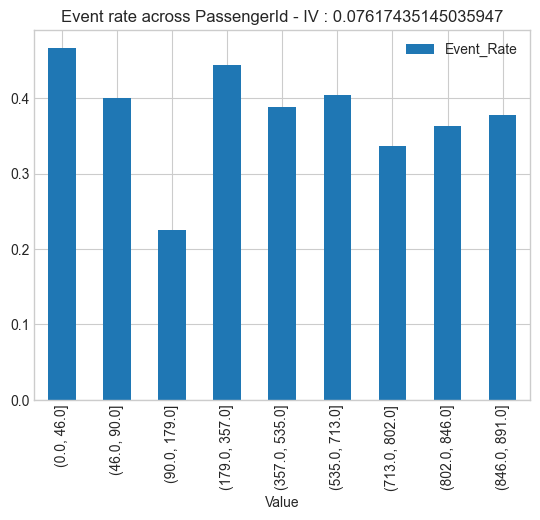

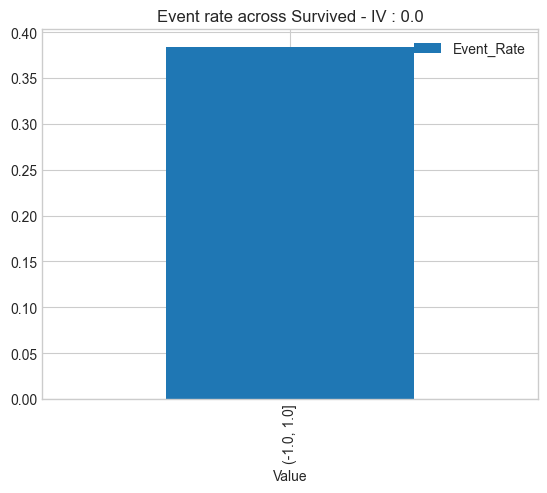

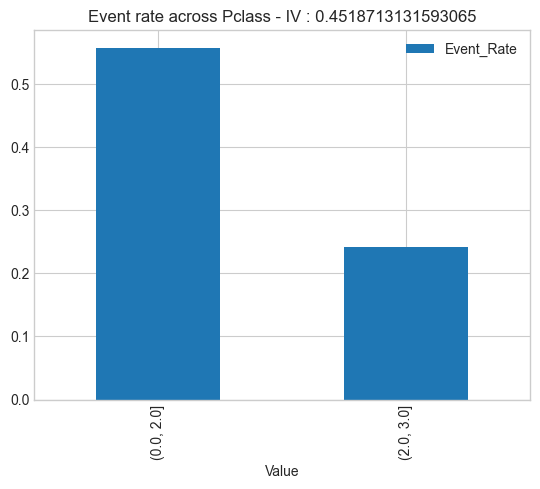

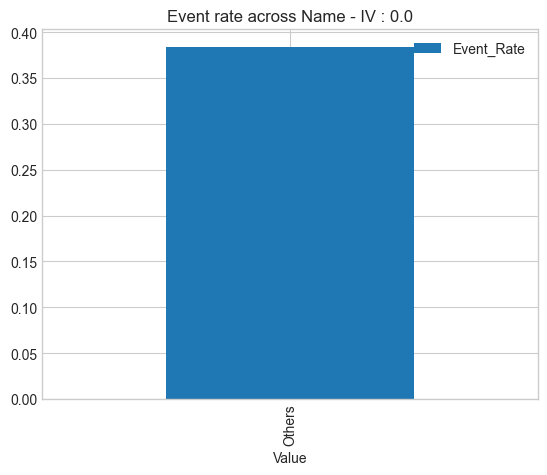

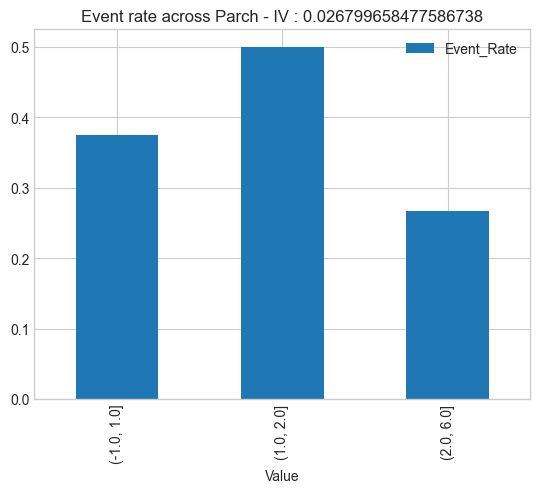

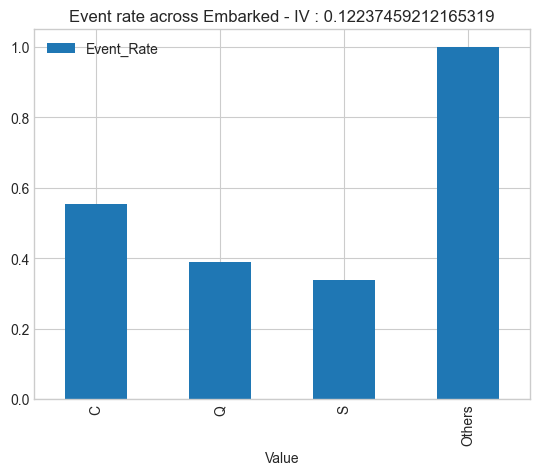

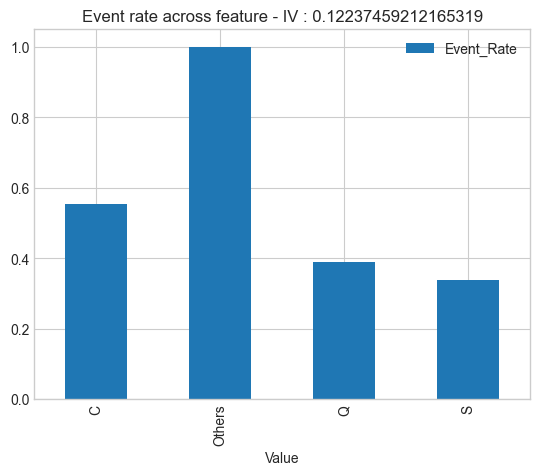

In [24]:
column_of_interest = 'Survived'   #Give the column name which has target feature here ( Ensure that target column has !/0 values, preferably 1 for Default/ 0 for non default)

for feat in train_df.columns:
    dset, iv = calculate_woe_iv(train_df,feat , column_of_interest , 1)
    print("Information Value : ",  feat , " - ", iv)
    dset[['Value','Event_Rate']].plot.bar(x= "Value", y='Event_Rate', title= ("Event rate across " + feat + " - IV : " + str(iv) ) )


## Hypothesis testing
- https://docs.google.com/document/d/1MZDs6gGfpKT_uPvNUQAo62QWIej9SMXCDxCPtpSixE4/edit

## Bivariate Graphs

In [3]:
def bivariate_graphs(base01, projectname):

    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

     
    
    top_5_feats = list(feat_imp['variable'].head(8))
    top_5_feats.append(targetcol)
    base01_pandas = h2o.as_list(base01[top_5_feats])
    #print(base01_pandas.head(2))
    for feat in feat_imp['variable'].head(8):
        w , i = pandas_calculate_woe_iv(base01_pandas[[feat,targetcol]], feat, targetcol,target_category)
    
        fig = plt.figure()
        plt.rcParams["figure.figsize"] = (18, 7)

        width = .75 # width of a bar

        i_temp = w.head(10)
        i_temp['Proportion of Observations'] = i_temp['Prop']
        i_temp[ 'Percentage of ' + target_category] = i_temp['Conversion_Bad']

        i_temp[['Proportion of Observations','Percentage of ' + target_category]].plot(kind='bar', width = width )
        #i_temp['Conversion_Bad'].plot()

        ax = plt.gca()
        plt.xlim([-width, len(i_temp['Value'])-width])
        ax.set_xticklabels(i_temp['Value'] )

        ax.set_title(str('Relationship with ' + target_category + ' : ' + feat),fontsize = 28)
        #plt.legend(loc='upper right', fontsize = 18)

        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.1,
                         box.width, box.height * 0.9])

        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
                  fancybox=True, shadow=True, ncol=5,fontsize = 18)


        plt.xticks(fontsize=18, rotation=60)
        plt.yticks(fontsize=18)


        plt.show()


## Bivariate Graph - with category

In [2]:
def bivariate_graphs(base01,feat,targetcol, target_category):

    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd


    w , i = pandas_calculate_woe_iv(base01[[feat,targetcol]], feat, targetcol,target_category)
   
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (18, 7)

    width = .75 # width of a bar

    i_temp = w.head(10)
    i_temp['Proportion of Observations'] = i_temp['Prop']
    i_temp[ 'Percentage of ' + target_category] = i_temp['Conversion_Bad']

    i_temp[['Proportion of Observations','Percentage of ' + target_category]].plot(kind='bar', width = width )
    #i_temp['Conversion_Bad'].plot()

    ax = plt.gca()
    plt.xlim([-width, len(i_temp['Value'])-width])
    ax.set_xticklabels(i_temp['Value'] )

    ax.set_title(str('Relationship with ' + target_category + ' : ' + feat),fontsize = 28)
    #plt.legend(loc='upper right', fontsize = 18)

    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                         box.width, box.height * 0.9])

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
        fancybox=True, shadow=True, ncol=5,fontsize = 18)


    plt.xticks(fontsize=18, rotation=60)
    plt.yticks(fontsize=18)


    plt.show()
